<AxesSubplot:xlabel='country'>

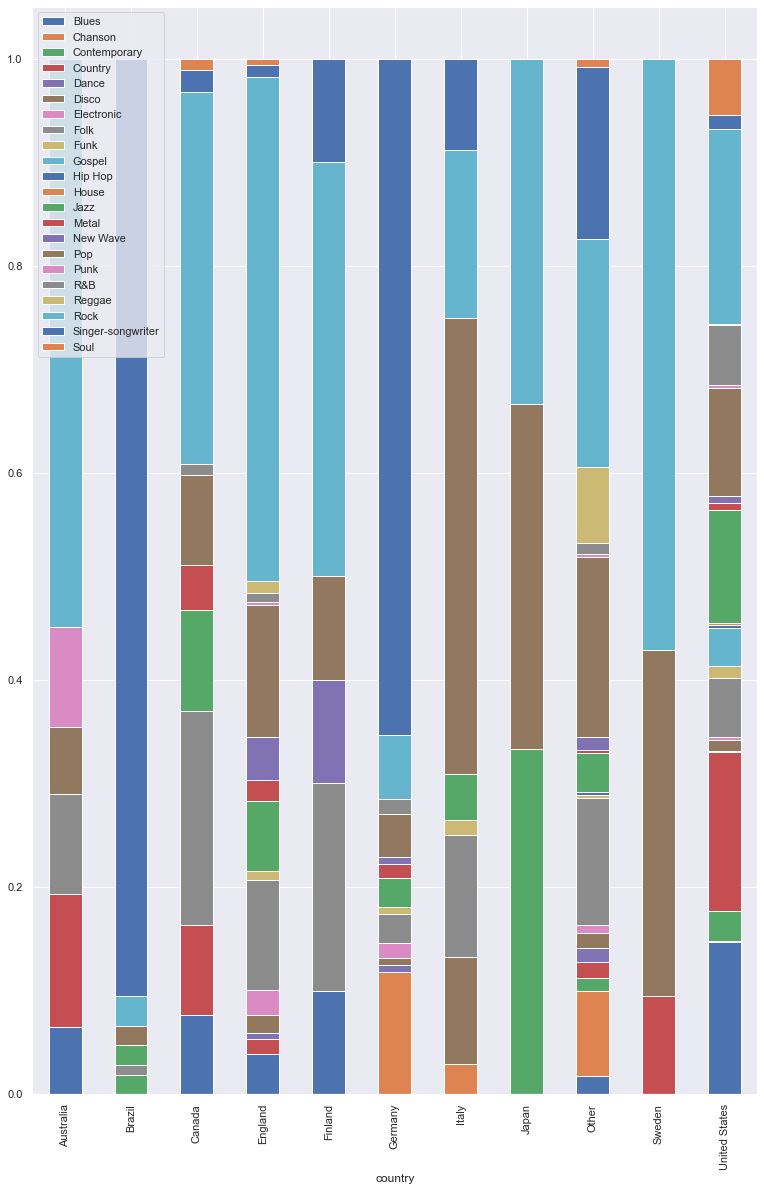

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (13, 20)

df = pd.read_csv('wasabi_pp.csv')
#decades
df_50 = df.loc[df['year'] == 1]
df_60 = df.loc[df['year'] == 2]
df_70 = df.loc[df['year'] == 3]
df_80 = df.loc[df['year'] == 4]
df_90 = df.loc[df['year'] == 5]
df_2000 = df.loc[df['year'] == 6]

#drop year
df_50 = df_50.drop(columns=['year'])

#unstacked
df_50_unst = df_50.groupby('locationInfo')['dbp_genre'].value_counts().unstack().fillna(0)
df_50_unst.head(10)

#reset index
df_50_unst.reset_index(inplace = True, drop = True)
df_50_unst.rename(columns={"dbp_genre": "country"})
df_50_unst.head(10)

#rename columns
df_50_unst.columns = ['Blues', 'Chanson', 'Contemporary', 'Country', 'Dance', 'Disco',
       'Electronic', 'Folk', 'Funk', 'Gospel', 'Hip Hop', 'House', 'Jazz',
       'Metal', 'New Wave', 'Pop', 'Punk', 'R&B', 'Reggae', 'Rock',
       'Singer-songwriter', 'Soul']

#normalizing
df_50_norm = df_50_unst.div(df_50_unst.sum(axis=1), axis=0)

#adding country column
df_50_norm.insert(0, 'country', ['Australia', 'Brazil', 'Canada', 'England', 'Finland', 'Germany',
       'Italy', 'Japan', 'Other', 'Sweden', 'United States'])

#plot
sns.set()
df_50_norm.set_index('country').plot(kind='bar', stacked=True)

In [2]:
df_50_norm.to_csv('df_50_norm.csv', index = False)

In [3]:
df_50_norm.to_json(r'df_50_norm.json', orient="records")